In [46]:
import pandas as pd
import numpy as np
import scipy as sp
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import networkx as nx

<h2> Create Nested-Dictionary Based Adjacency Lists </h2>

In [17]:
#Requires a set of tuples for edges and a callable weight function
def adj_list(edges, weightfn):
    adjlist = dict()
    def add_to_list(e1, e2, w):
        if not adjlist.get(e1, None):
            adjlist[e1] = dict()
        if adjlist[e1].get(e2, None):
            adjlist[e1][e2] = w if adjlist[e1][e2]>w else adjlist[e1][e2]
        else:
            adjlist[e1][e2] = w
    for edge in edges:
        add_to_list(edge[0], edge[1], weightfn(edge))
        add_to_list(edge[1], edge[0], weightfn(edge))
    for key in adjlist.keys():
        adjlist[key] = collections.OrderedDict(sorted(adjlist[key].items(), key=lambda t:t[1]))
    return adjlist

<h2> Implement Prim's Algorithm </h2>

In [27]:
def lowest_edge(seen, adjlist):
    ledge, lval = None, None
    for vert in seen.keys():
        for key in adjlist[vert].keys():
            if seen.get(key, False)==False:
                if (not lval) or (adjlist[vert][key]<lval):
                    ledge = (vert, key)
                    lval = adjlist[vert][key]
                break
    return ledge

In [34]:
def prims(verts, edges, weightfn):
    adjlist = adj_list(edges, weightfn)
    mst = collections.deque()
    seen = dict()
    for v in verts:
        seen[v]=True
        break
    while len(seen)<len(verts):
        ledge = lowest_edge(seen, adjlist)
        seen[ledge[1]] = True
        mst.append(ledge)
    return mst

In [74]:
def draw_graph(verts, edges, weights):
    G = nx.Graph()
    G.add_nodes_from(verts)
    G.add_edges_from(edges)
    plt.figure(figsize=(4,4))
    pos = nx.spring_layout(G)
    mst = prims(verts, edges, lambda s: weights[s])
    edgcol = dict()
    for edge in mst:
        edgcol[edge]="red"
    colors = collections.deque()
    for edge in edges:
        if (not edgcol.get(edge, False)) and (not edgcol.get((edge[1],edge[0]), False)):
            colors.append("black")
        else:
            colors.append("red")
    nx.draw(G, pos, with_labels=True, edge_color=colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.show()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


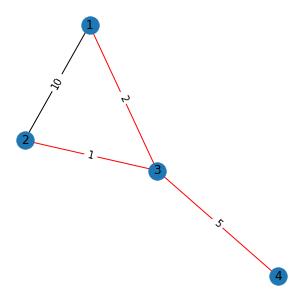

In [76]:
#Graph1
verts = {1,2,3,4}
edges = {(1,2),(2,3),(1,3),(3,4)}
weights = {(1,2):10, (1,3):2, (2,3):1, (3,4):5}
draw_graph({1,2,3,4}, edges, weights)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


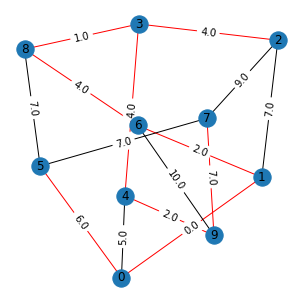

In [91]:
#Graph2
G = nx.petersen_graph()
draw_graph(G.nodes, G.edges, dict(zip(G.edges, np.round(np.random.uniform(0,10,len(G.edges))))))